<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Eye_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
! wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

--2022-10-07 06:15:36--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml     [ <=>                ]   3.64M  --.-KB/s    in 0.09s   

2022-10-07 06:15:37 (40.0 MB/s) - ‘haarcascade_eye.xml’ saved [3813310]



In [3]:
#!tar -xvf "/content/drive/MyDrive/Qualcom/crop_part1.tar.gz" -C "/content/drive/MyDrive/Qualcom"

In [4]:
#!tar -xvf "/content/drive/MyDrive/Qualcom/UTKFace.tar.gz" -C "/content/drive/MyDrive/Qualcom"

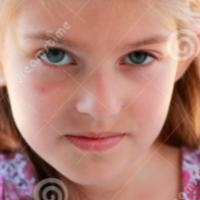

In [8]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/6_1_0_20170109202302115.jpg.chip.jpg")
cv2_imshow(image)

In [9]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(image)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [10]:
eyes[0].shape,eyes[1].shape

((46, 46, 3), (55, 55, 3))

In [11]:
width, height, ch = eyes[0].shape

In [12]:
width, height, ch

(46, 46, 3)

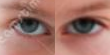

In [13]:
import numpy as np
a = np.concatenate((eyes[1], cv2.resize(eyes[0], (55, 55))), axis = 1)
cv2_imshow(a)

## right eye

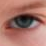

In [14]:
cv2_imshow(eyes[0])

## lefy eye

In [18]:
i = cv2.resize(eyes[0], (224,224),interpolation = cv2.INTER_AREA)

In [20]:
i = cv2.resize(eyes[0], (224,224),interpolation =cv2.INTER_CUBIC)

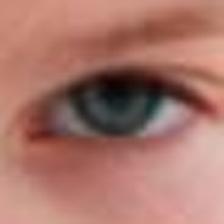

In [21]:
cv2_imshow(i)

In [37]:
def extract_eye(source,destination):
  eyes = []
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
  eye = eye_cascade.detectMultiScale(image)
  for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  width, height, ch = eyes[1].shape
  a = np.concatenate((eyes[1], cv2.resize(eyes[0], (width, height))), axis = 1)
  # resize the image
  i = cv2.resize(a, (224,224),interpolation =cv2.INTER_CUBIC)
  #print(destination)
  cv2.imwrite(destination,i)

In [27]:
import os
path = "/content/drive/MyDrive/Qualcom/crop_part1"
files = os.listdir(path)
files[100]

'5_1_0_20170109191946614.jpg.chip.jpg'

In [29]:
source = os.path.join(path,files[100])
filename = files[100].split(".")[0] + "_resized.jpg"
destination = filename
extract_eye(source,destination)

5_1_0_20170109191946614_resized.jpg


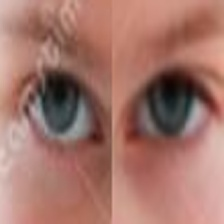

In [30]:
img = cv2.imread("/content/5_1_0_20170109191946614_resized.jpg")
cv2_imshow(img)

## Resize Image – cv2.resize()

In [31]:
img.shape

(224, 224, 3)

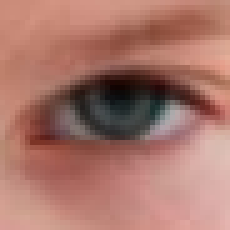

In [17]:
import cv2
 
#src = cv2.imread("/content/drive/MyDrive/Qualcom/crop_part1/6_1_0_20170109202302115.jpg.chip.jpg", cv2.IMREAD_UNCHANGED)
src = eyes[0]
#percent by which the image is resized
scale_percent = 500 # percent of original size

#calculate the 50 percent of original dimensions
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)

# dsize
dsize = (width, height)

# resize image
output = cv2.resize(src, dsize,interpolation = cv2.INTER_AREA)
cv2_imshow(output)

In [ ]:
cv2.imwrite('/cv2-resize-image-50.png',output) 

True

In [ ]:
dsize

(184, 184)

In [ ]:
eyes = []
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye = eye_cascade.detectMultiScale(output)
for (x,y,w,h) in eye:
    eye = image[y : y+h , x : x+w]
    eyes.append(eye)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
eyes[0].shape,eyes[1].shape

((24, 0, 3), (99, 99, 3))

In [ ]:
cv2_imshow(eyes[0])

error: ignored

## Count the number of images

In [ ]:
import os
image_path_1 = "/content/drive/MyDrive/Qualcom/crop_part1"
len(os.listdir(image_path_1))

9780

In [ ]:
len(os.listdir("/content/drive/MyDrive/Qualcom/UTKFace"))

23708

In [40]:
files = os.listdir(image_path_1)

In [41]:
files[0]

'3_1_0_20170109191958848.jpg.chip.jpg'

In [38]:
files = os.listdir(image_path_2)

In [39]:
files[0]

'56_0_2_20170119180737540.jpg.chip.jpg'

## Labels
* The labels of each face image is embedded in the file name, formated like [age]_[gender]_[race]_[date&time].jpg

* [age] is an integer from 0 to 116, indicating the age
* [gender] is either 0 (male) or 1 (female)
* [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
* [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [42]:
from tqdm import tqdm
age = []
gender = []
race = []
image_path = []
eye_image_path = []
destination = "/content/drive/MyDrive/Qualcom/Eye_Images"
image_path_2 ="/content/drive/MyDrive/Qualcom/UTKFace"
image_path_1 = "/content/drive/MyDrive/Qualcom/crop_part1"
for file in tqdm(os.listdir(image_path_2)):
  image_p = os.path.join("UTKFace",file)
  name = file.split(".")[0] + "_resized.jpg"
  eye_path = os.path.join("Eye_Images",name)
  source = os.path.join("/content/drive/MyDrive/Qualcom/UTKFace",file)
  destination = os.path.join("/content/drive/MyDrive/Qualcom/Eye_Images",name)
  image_path.append(image_p)
  eye_image_path.append(eye_path)
  name = file.split("_")
  age.append(name[0])
  gender.append(name[1])
  race.append(name[2])
  extract_eye(source,destination)


100%|██████████| 23708/23708 [13:04<00:00, 30.20it/s]


In [43]:
len(age)

23708

In [34]:
import pandas as pd
df = pd.DataFrame({'image_path':image_path,'Eye_image_path':eye_image_path,'age':age,'gender':gender,'race':race})

In [44]:
df1 = pd.DataFrame({'image_path':image_path,'Eye_image_path':eye_image_path,'age':age,'gender':gender,'race':race})

In [35]:
df.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,Eye_Images/3_1_0_20170109191958848_resized.jpg,3,1,0
1,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,Eye_Images/3_1_0_20170109192003664_resized.jpg,3,1,0
2,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,Eye_Images/3_1_0_20170109192006973_resized.jpg,3,1,0
3,crop_part1/3_1_0_20170109192027975.jpg.chip.jpg,Eye_Images/3_1_0_20170109192027975_resized.jpg,3,1,0
4,crop_part1/3_1_0_20170109192130439.jpg.chip.jpg,Eye_Images/3_1_0_20170109192130439_resized.jpg,3,1,0


In [36]:
df.to_csv("crop_part1.csv",index=False)

In [45]:
df1.head()

,image_path,Eye_image_path,age,gender,race
0,UTKFace/56_0_2_20170119180737540.jpg.chip.jpg,Eye_Images/56_0_2_20170119180737540_resized.jpg,56,0,2
1,UTKFace/56_0_3_20170119183551541.jpg.chip.jpg,Eye_Images/56_0_3_20170119183551541_resized.jpg,56,0,3
2,UTKFace/56_0_3_20170119152358239.jpg.chip.jpg,Eye_Images/56_0_3_20170119152358239_resized.jpg,56,0,3
3,UTKFace/56_0_3_20170119180848388.jpg.chip.jpg,Eye_Images/56_0_3_20170119180848388_resized.jpg,56,0,3
4,UTKFace/56_0_3_20170119180731484.jpg.chip.jpg,Eye_Images/56_0_3_20170119180731484_resized.jpg,56,0,3


In [46]:
df1.to_csv("UTKface.csv",index=False)

In [47]:
final_df = pd.concat([df,df1])

In [48]:
final_df.head()

,image_path,Eye_image_path,age,gender,race
0,crop_part1/3_1_0_20170109191958848.jpg.chip.jpg,Eye_Images/3_1_0_20170109191958848_resized.jpg,3,1,0
1,crop_part1/3_1_0_20170109192003664.jpg.chip.jpg,Eye_Images/3_1_0_20170109192003664_resized.jpg,3,1,0
2,crop_part1/3_1_0_20170109192006973.jpg.chip.jpg,Eye_Images/3_1_0_20170109192006973_resized.jpg,3,1,0
3,crop_part1/3_1_0_20170109192027975.jpg.chip.jpg,Eye_Images/3_1_0_20170109192027975_resized.jpg,3,1,0
4,crop_part1/3_1_0_20170109192130439.jpg.chip.jpg,Eye_Images/3_1_0_20170109192130439_resized.jpg,3,1,0


In [49]:
final_df.shape

(33488, 5)

In [50]:
final_df.to_csv("final_images.csv",index=False)